In [0]:
#필요한 라이브러리 불러오기

#회귀분석
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

from scipy import stats
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#소프트벡터
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [180]:
#구글 드라이브 연결
import matplotlib.font_manager as fm
from google.colab import drive


drive.mount('/content/drive')

fm._rebuild()


!apt-get update -qq
!apt-get install fonts-nanum* -qq


path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NanumGothic Eco


##  미국 인구 조사국에서 수집한 보스턴 시의 주택가격에 대한 데이터를 분석하여 의미있는 정보를 도출하고자 합니다.

##  <분석 순서>
## 1.분석기획
### -분석에 대한 목표 제시
## 2.데이터 준비
### -변수에 대한 이해
## 3.데이터 정제 및 탐색적 분석
### -이상치와 결측치 처리(품질확인)
### -분석계획수립
### -탐색적 분석을 통해 insight 도출
## 4.모델링
### -분석계획에 따라 모델링 진행
## 5.평가 및 활용
### -분석을 통한 insight 결과 설명

-----------------------------------------------------------------------------

## 1.분석기획-분석에 대한 목표제시

### #1미국 보스턴 주택 가격에 대한 데이터를 활용하여 각 변수가 집값에 미치는 영향을 확인해 보고자 합니다.

### #2각 변수들에 대한 이해를 바탕으로 집값을 예측하는 모델을 구하겠습니다.

### #3집 값을 범위로 나누어 소득계층으로 구분하고 소득계층을 예측하는 모델을 구하겠습니다.

## 2.데이터 준비-변수에 대한 이해

In [181]:
#데이터 로딩 및 데이터 확인

df_raw = pd.read_csv("/content/drive/My Drive/test/3. Big Data 분석/BOSTON_HOUSING.csv",  engine= "python", encoding="CP949")

print(df_raw.count())
df_raw.head()

MEDV       506
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


#### (목적변수) MEDV : 주택가격(중앙값) 단위: 1000 달러
#### CRIM : 범죄율
#### ZN : 주거지 비율 -> %비율을 0~1사이의 비율 값으로 변경 필요
#### INDUS : 비소매업 비율 -> %비율을 0~1사이의 비율 값으로 변경 필요
#### CHAS : 강 조망(1-조망,0-비조망) 
#### NOX : 산화질소 농도
#### RM : 주거당 평균 객실 수
#### AGE : 노후 건물의 비율 ->%비율을 0~1사이의 비율 값으로 변경 필요
#### DIS : 중심지(노동센터) 접근 거리
#### RAD : 고속도로 접근 편이성 지수
#### TAX : 재산세율 ->1000달러당 재산세율 이므로 0~1사이의 비율로 변경 필요
#### PTRATIO : 학생당 교사 비율-> %비율을 0~1사이의 비율로 변경 필요
#### B : 흑인 인구 비율 -> 비율을 구하기 위한 공식을 사용하여 변경 필요
#### LSTAT : 저소득층 비율 -> %비율을 0~1사이의 비율로 변경 필요

## 3.데이터 정제 및 탐색적분석-이상치와 결측치 처리

In [182]:
#데이터 결측치 확인
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [0]:
#데이터 단위 값 처리

#ZN : 주거지 비율 -> %비율을 0~1사이의 비율 값으로 변경

df_raw["ZN"]=df_raw["ZN"]/100

#INDUS : 비소매업 비율 -> %비율을 0~1사이의 비율 값으로 변경

df_raw["INDUS"]=df_raw["INDUS"]/100

#AGE : 노후 건물의 비율 ->%비율을 0~1사이의 비율 값으로 변경

df_raw["AGE"]=df_raw["AGE"]/100

#TAX : 재산세율 ->1000달러당 재산세율 이므로 0~1사이의 비율로 변경

df_raw["TAX"]=df_raw["TAX"]/100

#PTRATIO : 학생당 교사 비율-> %비율을 0~1사이의 비율로 변경

df_raw["PTRATIO"]=df_raw["PTRATIO"]/100

#B : 흑인 인구 비율 -> 비율을 구하기 위한 공식을 사용

df_raw["B"]=(np.sqrt(df_raw["B"])/1000)+0.63

#LSTAT : 저소득층 비율 -> %비율을 0~1사이의 비율로 변경 필요

df_raw["LSTAT"]=df_raw["LSTAT"]/100

In [184]:
df_raw.round(4)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.0063,0.180,0.0231,0,0.538,6.575,0.652,4.0900,1,2.96,0.153,0.6499,0.0498
1,21.6,0.0273,0.000,0.0707,0,0.469,6.421,0.789,4.9671,2,2.42,0.178,0.6499,0.0914
2,34.7,0.0273,0.000,0.0707,0,0.469,7.185,0.611,4.9671,2,2.42,0.178,0.6498,0.0403
3,33.4,0.0324,0.000,0.0218,0,0.458,6.998,0.458,6.0622,3,2.22,0.187,0.6499,0.0294
4,36.2,0.0690,0.000,0.0218,0,0.458,7.147,0.542,6.0622,3,2.22,0.187,0.6499,0.0533
5,28.7,0.0299,0.000,0.0218,0,0.458,6.430,0.587,6.0622,3,2.22,0.187,0.6499,0.0521
6,22.9,0.0883,0.125,0.0787,0,0.524,6.012,0.666,5.5605,5,3.11,0.152,0.6499,0.1243
7,27.1,0.1445,0.125,0.0787,0,0.524,6.172,0.961,5.9505,5,3.11,0.152,0.6499,0.1915
8,16.5,0.2112,0.125,0.0787,0,0.524,5.631,1.000,6.0821,5,3.11,0.152,0.6497,0.2993
9,18.9,0.1700,0.125,0.0787,0,0.524,6.004,0.859,6.5921,5,3.11,0.152,0.6497,0.1710


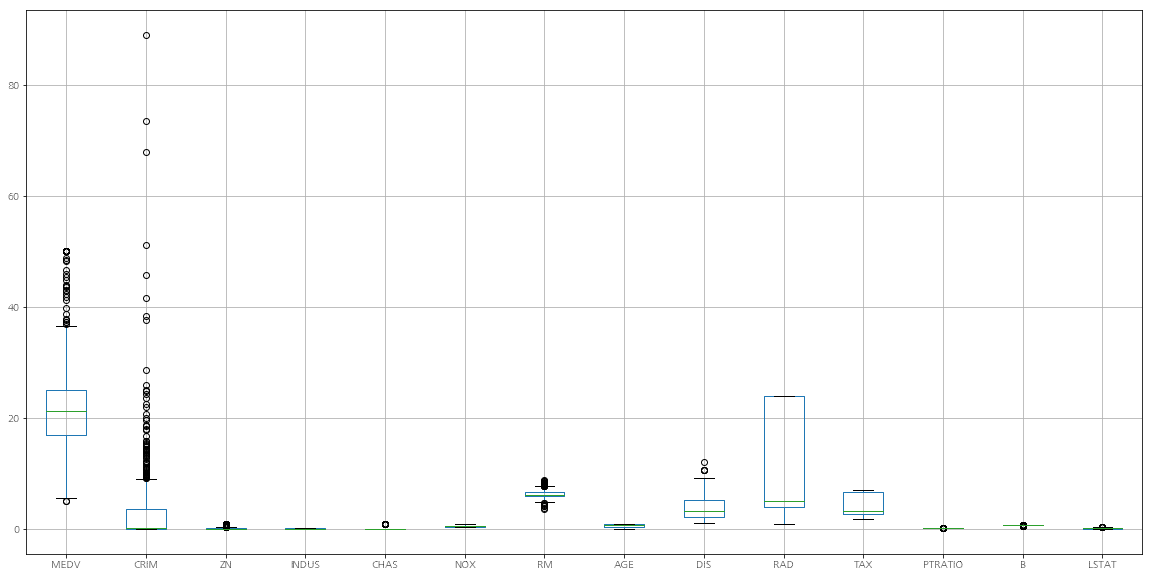

In [185]:
#박스플롯
df_raw.boxplot(figsize =(20,10))

In [186]:
#for문을 활용한 이상치 대체
for x in df_raw.columns:
  if x == "MEDV" or x=="CHAS":
    continue
  a = np.percentile(df_raw[x],[25,75])
  up = a[1] + 1.5*(a[1]-a[0])
  down = a[1] - 1.5*(a[1]-a[0])
  df_raw[x][df_raw[x]>up] = up
  df_raw[x][df_raw[x]<down] =down


print(df_raw.describe())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


             MEDV        CRIM          ZN  ...     PTRATIO           B       LSTAT
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean    22.532806    2.225032    0.069634  ...    0.186874    0.649635    0.126125
std      9.197104    3.313353    0.120288  ...    0.017434    0.000315    0.070161
min      5.000000    0.006320    0.000000  ...    0.160000    0.649109    0.019475
25%     17.025000    0.082045    0.000000  ...    0.174000    0.649375    0.069500
50%     21.200001    0.256510    0.000000  ...    0.190500    0.649785    0.113600
75%     25.000000    3.677083    0.125000  ...    0.202000    0.649905    0.169550
max     50.000000    9.069639    0.312500  ...    0.220000    0.649922    0.319625

[8 rows x 14 columns]


## 3.데이터 정제 및 탐색적 분석 -분석계획수립

## #1미국 보스턴 주택 가격에 대한 데이터를 활용하여 각 변수가 집값에 미치는 영향을 확인해 보고자 합니다.
####   (1)범죄율에 따른 집값
####   (2)주거지 비율에 따른 집값
####   (3)비소매업 비율에 따른 집값
####   (4)강조망 여부에 따른 집값
####   (5)노후건물의 비율에 따른 집값
####   (6)중심지 접근거리에 따른 집값
####   (7)고속도로 접근 편이성 지수에 따른 집값
####   (8)재산세율에 따른 집값
####   (9)학생단 교사 비율에 따른 집값
####   (10)흑인인구 비율에 따른 집값
####   (11)저소득층 비율에 따른 집값

####   각 변수들과 집값의 상관관계를 산점도와 상관관계분석을 통하여 확인합니다.
####   변수들 중 이산적인 특징을 보이는 변수들을 이산형으로 바꾸어 이산형으로 나눈 결과가  통계적으로 유의한지 확인하여줍니다. 유의할 경우 이산형으로 바꾼 값으로 대체합니다.
####   주택가격에 따라 데이터를 상위 중위 하위로 그룹을 나누어 그룹에 따라 변수들의 값이 차이를 가지는지 확인하여 봅니다.

### #2각 변수들에 대한 이해를 바탕으로 집값을 예측하는 모델을 구하겠습니다.
####   그레디언트 부스트, 서포트벡터 를 활용하여 구하고 값을 비교하여 예측력이 높은 모델 선택

### #3집 값을 범위로 나누어 소득계층으로 구분하고 소득계층을 예측하는 모델을 구하겠습니다.
####   그레디언트 부스트, 서포트벡터 를 활용하여 구하고 값을 비교하여 예측력이 높은 모델 선택

## 3.데이터 정제 및 탐색적 분석 -탐색적 분석을 통해 insight 도출

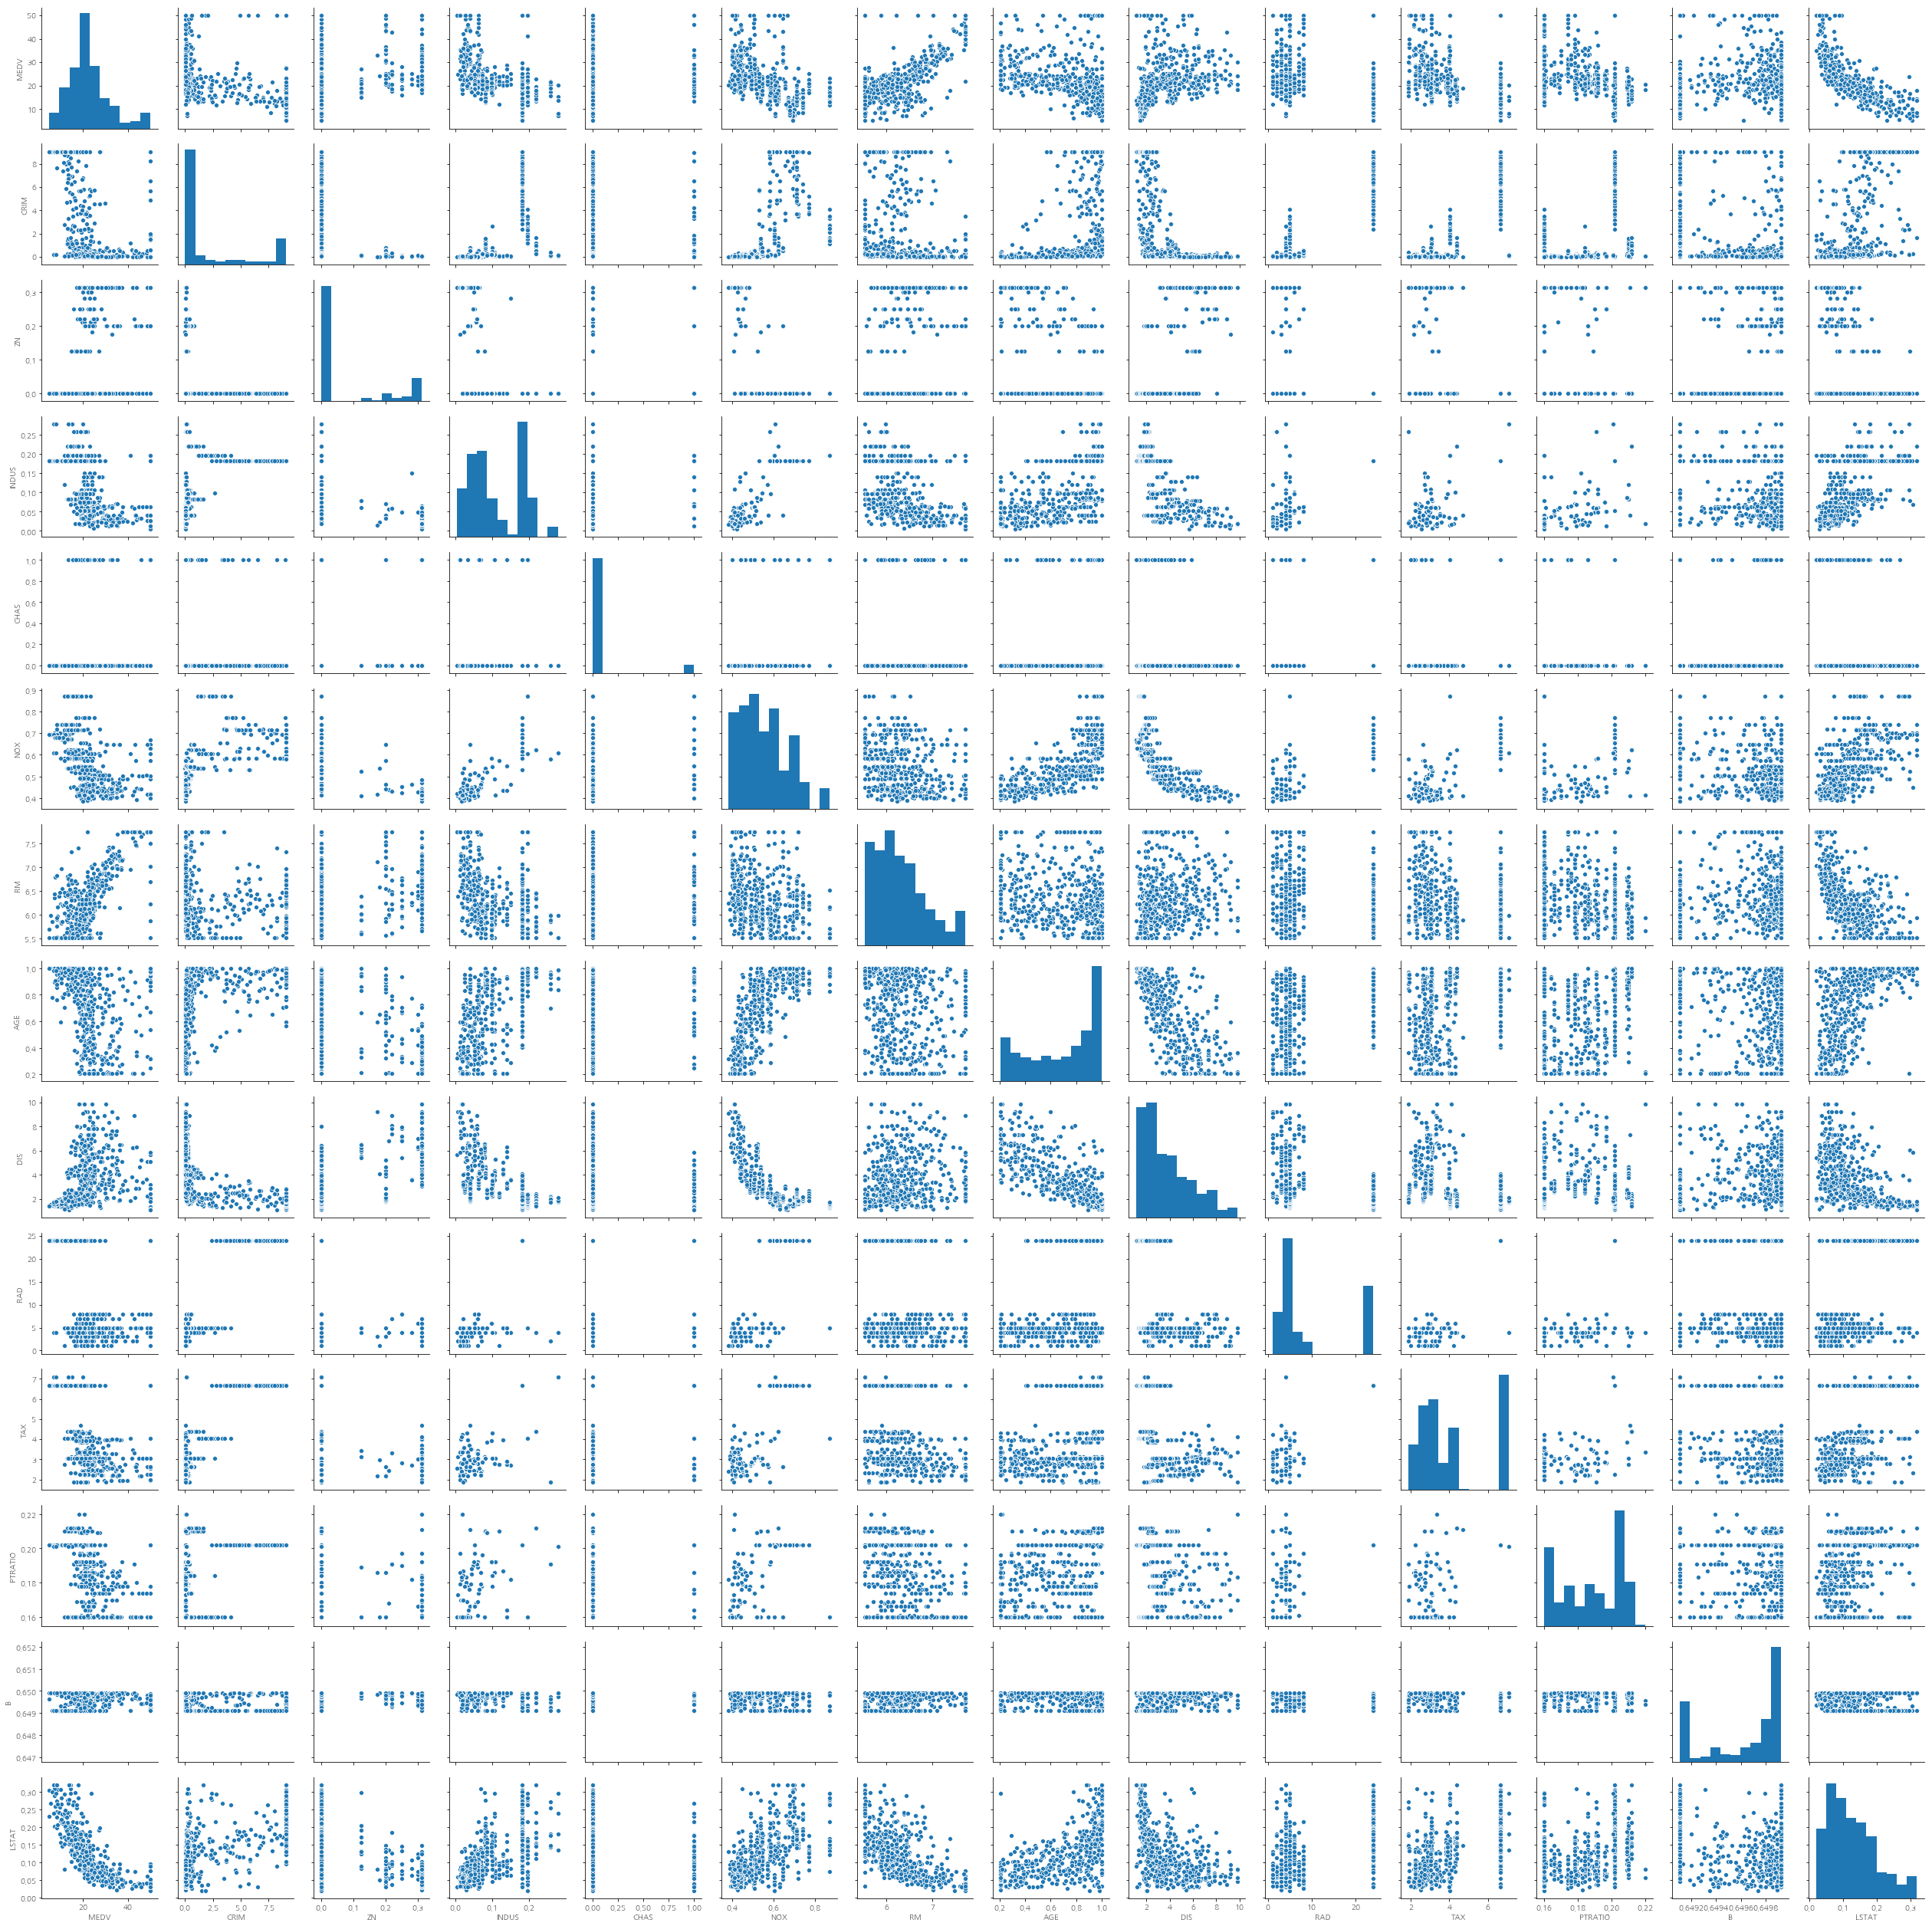

In [187]:
#산점도분석
sns.pairplot(df_raw)

In [188]:
# 산점도를 확인한 결과 범죄율, 주거지 비율, 고속도로 접근 편이성, 재산세율, 흑인인구 비율이 양측 단으로 쏠리는 형태로 데이터가 분포하는 것을 확인 하였습니다.
df_raw.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.454,0.375,-0.484,0.175,-0.427,0.726,-0.381,0.253,-0.382,-0.469,-0.499,0.202,-0.744
CRIM,-0.454,1.000,-0.370,0.629,-0.031,0.663,-0.220,0.526,-0.555,0.927,0.871,0.462,-0.382,0.593
ZN,0.375,-0.370,1.000,-0.584,-0.038,-0.550,0.360,-0.594,0.681,-0.344,-0.384,-0.439,0.208,-0.448
INDUS,-0.484,0.629,-0.584,1.000,0.063,0.764,-0.392,0.656,-0.713,0.595,0.721,0.430,-0.380,0.608
CHAS,0.175,-0.031,-0.038,0.063,1.000,0.091,0.087,0.085,-0.099,-0.007,-0.036,-0.131,-0.017,-0.053
NOX,-0.427,0.663,-0.550,0.764,0.091,1.000,-0.289,0.738,-0.776,0.611,0.668,0.286,-0.381,0.596
RM,0.726,-0.220,0.360,-0.392,0.087,-0.289,1.000,-0.235,0.190,-0.173,-0.262,-0.349,0.139,-0.607
AGE,-0.381,0.526,-0.594,0.656,0.085,0.738,-0.235,1.000,-0.759,0.462,0.513,0.346,-0.279,0.613
DIS,0.253,-0.555,0.681,-0.713,-0.099,-0.776,0.190,-0.759,1.000,-0.500,-0.540,-0.310,0.262,-0.503
RAD,-0.382,0.927,-0.344,0.595,-0.007,0.611,-0.173,0.462,-0.500,1.000,0.910,0.499,-0.352,0.489


In [0]:
#변수들 중 RM(주거당 평균 객실수), LSTAT(저소득층비율)이 가장 높은 상관관계를 가지고 있고 PTRATIO(학생당 교사비율), INDUS(비소매업비율), NOX(산화질소농도), TAX(재산세율)가 뒤를 이어 높은 상관성을 띄고 있다는 것을 알 수 있습니다.
#위에서 산점도를 확인한 결과 범죄율, 주거지 비율, 고속도로 접근 편이성, 재산세율, 흑인인구 비율의 데이터 분포가 양측 단으로 쏠리는 형태인 것을 확인 하였습니다.
#이에 따라 각 변수의 상위 50% 하위 50%의 집단의 평균이 서로 다른지 확인해보겠습니다. 




[0.082045   3.67708254]


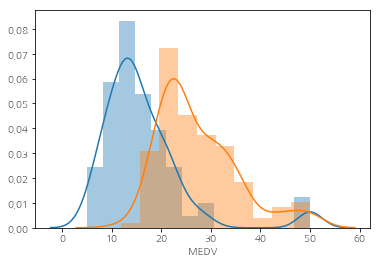

In [189]:
#범죄율 상위 25%의 평균과 하위 25%의 평균 차이 검정


x = np.percentile(df_raw["CRIM"],[25,75])
print(x)

df_CRIM_up=df_raw["MEDV"][df_raw["CRIM"]>x[1]]
df_CRIM_down=df_raw["MEDV"][df_raw["CRIM"]<=x[0]]

sns.distplot(df_CRIM_up,kde=True)
sns.distplot(df_CRIM_down,kde=True)

In [190]:
t_result=stats.ttest_ind(df_CRIM_up,df_CRIM_down)

t,p =t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-test")
print("검정통계량: {}".format(t))
print("p-value: {}".format(p))

# 2-Sample t-test 결과를 통해 범죄율 상위 25%와 하위 25%간의 집단에 차이가 있다고 볼수 있습니다.

2-Sample t-test
검정통계량: -10.732
p-value: 0.0


In [191]:
# 2-Sample t-test 결과를 통해 범죄율 상위 25%와 하위 25%간의 집단에 차이가 있다고 볼수 있습니다.
# 이에 따라 상위50%와 하위 50%로 나누어 범죄율을 상위=1, 하위=0 이렇게 두개의 이산 데이터로 처리해주겠습니다.

x = np.percentile(df_raw["CRIM"],50)
df_raw["CRIM"][df_raw["CRIM"]>x]=1
df_raw["CRIM"][df_raw["CRIM"]<=x]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.0


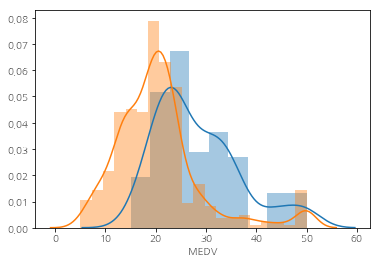

In [192]:
#주거지비율 상위 50%의 평균과 하위 50%의 평균 차이 검정


x = np.percentile(df_raw["ZN"],50)

print(x)
df_ZN_up=df_raw["MEDV"][df_raw["ZN"]>x]
df_ZN_down=df_raw["MEDV"][df_raw["ZN"]<=x]

sns.distplot(df_ZN_up,kde=True)
sns.distplot(df_ZN_down,kde=True)

In [193]:
t_result=stats.ttest_ind(df_ZN_up,df_ZN_down)

t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-test")
print("검정통계량: {}".format(t))
print("p-value: {}".format(p))

# 2-Sample t-test 결과를 통해 주거지비율 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다

2-Sample t-test
검정통계량: 9.038
p-value: 0.0


In [194]:
# 2-Sample t-test 결과를 통해 주거지비율 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.
# 이에 따라 상위50%와 하위 50%로 나누어 주거지비율을 상위=1, 하위=0 이렇게 두개의 이산 데이터로 처리해주겠습니다.


df_raw["ZN"][df_raw["ZN"]>x]=1
df_raw["ZN"][df_raw["ZN"]<=x]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


5.0


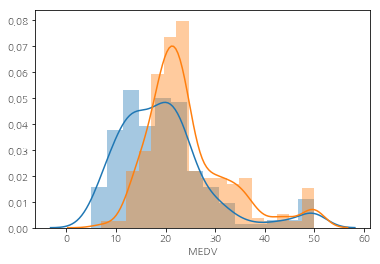

In [195]:
#고속도로 접근 편이성 상위 50%의 평균과 하위 50%의 평균 차이 검정


x = np.percentile(df_raw["RAD"],50)

print(x)
df_RAD_up=df_raw["MEDV"][df_raw["RAD"]>x]
df_RAD_down=df_raw["MEDV"][df_raw["RAD"]<=x]

sns.distplot(df_RAD_up,kde=True)
sns.distplot(df_RAD_down,kde=True)

In [196]:
t_result=stats.ttest_ind(df_RAD_up,df_RAD_down)

t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-test")
print("검정통계량: {}".format(t))
print("p-value: {}".format(p))

# 2-Sample t-test 결과를 통해 고속도로 접근 편이성 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.

2-Sample t-test
검정통계량: -5.973
p-value: 0.0


In [0]:
# 2-Sample t-test 결과를 통해 고속도로 접근 편이성 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.
# 이에 따라 상위50%와 하위 50%로 나누어 고속도로 접근 편이성을 상위=1, 하위=0 이렇게 두개의 이산 데이터로 처리해주겠습니다.


df_raw["RAD"] = pd.cut(df_raw["RAD"],2,labels=[0,1])
#df_raw["RAD"][df_raw["RAD"]>=x]=1
#df_raw["RAD"][df_raw["RAD"]<x]=0

3.3


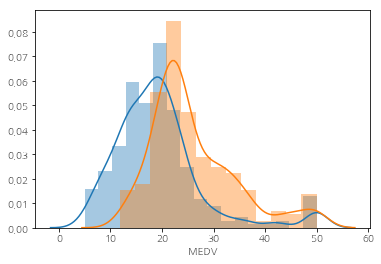

In [198]:
#재산세율 상위 50%의 평균과 하위 50%의 평균 차이 검정


x = np.percentile(df_raw["TAX"],50)

print(x)
df_TAX_up=df_raw["MEDV"][df_raw["TAX"]>=x]
df_TAX_down=df_raw["MEDV"][df_raw["TAX"]<x]

sns.distplot(df_TAX_up,kde=True)
sns.distplot(df_TAX_down,kde=True)

In [199]:
t_result=stats.ttest_ind(df_TAX_up,df_TAX_down)

t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-test")
print("검정통계량: {}".format(t))
print("p-value: {}".format(p))

# 2-Sample t-test 결과를 통해 재산세율 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.

2-Sample t-test
검정통계량: -8.879
p-value: 0.0


In [0]:
# 2-Sample t-test 결과를 통해 재산세율 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.
# 이에 따라 상위50%와 하위 50%로 나누어 재산세율을 상위=1, 하위=0 이렇게 두개의 이산 데이터로 처리해주겠습니다.

df_raw["TAX"] = pd.cut(df_raw["TAX"],2,labels=[0,1])
# df_raw["TAX"][df_raw["TAX"]>x]=1
# df_raw["TAX"][df_raw["TAX"]<=x]=0

[0.64937466 0.6499054 ]


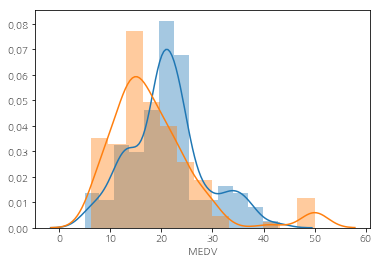

In [201]:
#흑인인구 비율 상위 50%의 평균과 하위 50%의 평균 차이 검정


x = np.percentile(df_raw["B"],[25,75])

print(x)
df_B_up=df_raw["MEDV"][df_raw["B"]>x[1]]
df_B_down=df_raw["MEDV"][df_raw["B"]<=x[0]]

sns.distplot(df_B_up,kde=True)
sns.distplot(df_B_down,kde=True)

In [202]:
t_result=stats.ttest_ind(df_B_up,df_B_down)

t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-test")
print("검정통계량: {}".format(t))
print("p-value: {}".format(p))

# 2-Sample t-test 결과를 통해 재산세율 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.

2-Sample t-test
검정통계량: 2.531
p-value: 0.012


In [203]:
# 2-Sample t-test 결과를 통해 흑인비율 상위 50%와 하위 50%간의 집단에 차이가 있다고 볼수 있습니다.
# 이에 따라 상위50%와 하위 50%로 나누어 흑인비율을 상위=1, 하위=0 이렇게 두개의 이산 데이터로 처리해주겠습니다.


df_raw["B"][df_raw["B"]>x]=1
df_raw["B"][df_raw["B"]<=x]=0

ValueError: ignored

In [0]:
df_raw

## 4.모델링 -분석계획에 따라 모델링 진행

In [0]:
#랜덤포레스트

In [0]:
df_raw_y = df_raw["MEDV"]
df_raw_x = df_raw.drop("MEDV",axis=1,inplace=False)

In [0]:
#
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_x.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_x.shape))

In [0]:
rf_uncustomized = RandomForestRegressor(random_state=83)#83
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

In [0]:
#estimators 의 값 정하기

train_score=[];test_score=[]

para_tree =[n_tree*5 for n_tree in range(1,40)]

for v_n_estimators in para_tree:
  
  rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=83)
  rf.fit(df_train_x,df_train_y)
  train_score.append(rf.score(df_train_x,df_train_y))
  test_score.append(rf.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["n_estimators"]=para_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)     

In [0]:
plt.plot(para_tree,train_score, linestyle="-",label="TrainScore")
plt.plot(para_tree,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("n_estimators")
plt.legend() ##########n=100

In [0]:
#모델 parameter조정 leaf


train_score=[];test_score=[]

para_leaf =[n_leaf*1 for n_leaf in range(1,41)]

for v_min_samples_leaf in para_leaf:
  
  rf=RandomForestRegressor(n_estimators=100, min_samples_leaf=v_min_samples_leaf, random_state=83)
  rf.fit(df_train_x,df_train_y)
  train_score.append(rf.score(df_train_x,df_train_y))
  test_score.append(rf.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["min_samples_leaf"]=para_leaf
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n.round(3)     

In [0]:
plt.plot(para_leaf,train_score, linestyle="-",label="TrainScore")
plt.plot(para_leaf,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_leaf")
plt.legend() #10

In [0]:
train_score=[];test_score=[]

para_split =[n_split*2 for n_split in range(1,40)]

for v_min_samples_split in para_split:
  
  rf=RandomForestRegressor(n_estimators=100, min_samples_leaf=10,min_samples_split=v_min_samples_split, random_state=83)
  rf.fit(df_train_x,df_train_y)
  train_score.append(rf.score(df_train_x,df_train_y))
  test_score.append(rf.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["min_samples_split"]=para_split
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)     

In [0]:
plt.plot(para_split,train_score, linestyle="-",label="TrainScore")
plt.plot(para_split,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_split")
plt.legend()#44

In [0]:
train_score=[];test_score=[]

para_depth =[depth*2 for depth in range(1,11)]

for v_max_depth in para_depth:
  
  rf=RandomForestRegressor(n_estimators=100, min_samples_leaf=10,min_samples_split=20,max_depth=v_max_depth, random_state=83)
  rf.fit(df_train_x,df_train_y)
  train_score.append(rf.score(df_train_x,df_train_y))
  test_score.append(rf.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["v_max_depth"]=para_depth
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)

In [0]:
plt.plot(para_depth,train_score, linestyle="-",label="TrainScore")
plt.plot(para_depth,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("max_depth")
plt.legend() # depth= 4

In [0]:
#최종모델

rf_final = RandomForestRegressor(random_state=83,n_estimators=100, min_samples_leaf=10,min_samples_split=20,max_depth=6)

rf_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on training set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

rf_final

In [0]:
#그래디언트 부스트
#기본모델생성

gb_uncustomized = GradientBoostingRegressor(random_state=100)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

In [0]:
#estimator 설정


train_score=[];test_score=[]

para_tree =[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_tree:
  
  gb=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=100)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n = pd.DataFrame()
df_score_n["n_estimators"]=para_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3) 

In [0]:
plt.plot(para_tree,train_score, linestyle="-",label="TrainScore")
plt.plot(para_tree,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("n_estimators")
plt.legend()#50

In [0]:
#min_samples_leaf 값 설정
train_score=[];test_score=[]

para_leaf =[n_leaf*1 for n_leaf in range(1,51)]

for v_min_samples_leaf in para_leaf:
  
  gb=GradientBoostingRegressor(n_estimators=50, min_samples_leaf=v_min_samples_leaf, random_state=100)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))

df_score_n=pd.DataFrame()
df_score_n["min_samples_leaf"]=para_leaf
df_score_n["TrainScore"]=train_score  
df_score_n["TestScore"]=test_score

df_score_n.round(3)    



In [0]:
plt.plot(para_leaf,train_score, linestyle="-",label="TrainScore")
plt.plot(para_leaf,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_leaf")
plt.legend()#14

In [0]:
#min_samples_split 값 설정

train_score=[];test_score=[]

para_split =[n_split*2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
  
  gb=GradientBoostingRegressor(n_estimators=30, min_samples_leaf=14,min_samples_split=v_min_samples_split, random_state=100)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["min_samples_split"]=para_split
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)  

In [0]:
plt.plot(para_split,train_score, linestyle="-",label="TrainScore")
plt.plot(para_split,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_split")
plt.legend()#28

In [0]:
#max_depth 값 설정

train_score=[];test_score=[]

para_depth =[depth for depth in range(1,21)]

for v_max_depth in para_depth:
  
  gb=GradientBoostingRegressor(n_estimators=30, min_samples_leaf=14,min_samples_split=28,max_depth=v_max_depth, random_state=100)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["v_max_depth"]=para_depth
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)    

In [0]:
plt.plot(para_depth,train_score, linestyle="-",label="TrainScore")
plt.plot(para_depth,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("max_depth")
plt.legend()#6

In [0]:
#learning_rate 설정

train_score=[];test_score=[]

para_lr =[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
  
  gb=GradientBoostingRegressor(n_estimators=30, min_samples_leaf=14,min_samples_split=28,
                               max_depth=6, learning_rate = v_learning_rate, random_state=100)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["v_max_depth"]=para_lr
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)    


In [0]:
plt.plot(para_lr,train_score, linestyle="-",label="TrainScore")
plt.plot(para_lr,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("max_depth")
plt.legend()

In [0]:
#최종 결론 도출

gb_final=GradientBoostingRegressor(n_estimators=30, min_samples_leaf=14,min_samples_split=28,
                               max_depth=6, learning_rate = 0.3, random_state=100)


gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

gb_final

## 4.모델링-  주택가격을 3그룹으로 나누어 소득 상위계층, 소득 중위계층,  소득하위계층 으로 나눈후 각지역의 소득계층을 예측하는 모델 구축 

In [0]:
x = np.percentile(df_raw["MEDV"],[25,75])

df_raw['MEDV'] = pd.cut(df_raw['MEDV'], bins=[-1000,x[0],x[1],10000], labels=[0,1,2])

df_raw

In [0]:
df_raw_y1 = df_raw["MEDV"]
df_raw_x1 = df_raw.drop("MEDV",axis=1,inplace=False)

In [0]:
#
df_train_x1,df_test_x1,df_train_y1,df_test_y1=train_test_split(df_raw_x1,df_raw_y1,test_size=0.3,random_state=1234)

print("train data X size:{}".format(df_train_x1.shape))
print("train data Y size:{}".format(df_train_x1.shape))
print("test data X size:{}".format(df_test_x1.shape))
print("test data Y size:{}".format(df_test_x1.shape))

In [0]:
rf_uncustomized = RandomForestRegressor(random_state=900)#83
rf_uncustomized.fit(df_train_x1,df_train_y1)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x1,df_train_y1)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x1,df_test_y1)))

In [0]:
#estimators 의 값 정하기

train_score=[];test_score=[]

para_n_tree =[n_tree*5 for n_tree in range(1,40)]

for v_n_estimators in para_n_tree:
  
  rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=900)
  rf.fit(df_train_x1,df_train_y1)
  train_score.append(rf.score(df_train_x1,df_train_y1))
  test_score.append(rf.score(df_test_x1,df_test_y1))
  

df_score_n=pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)     

In [0]:
plt.plot(para_n_tree,train_score, linestyle="-",label="TrainScore")
plt.plot(para_n_tree,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("n_estimators")
plt.legend() ##########n=50

In [0]:
#모델 parameter조정 leaf


train_score=[];test_score=[]

para_n_leaf =[n_leaf*1 for n_leaf in range(1,41)]

for v_min_samples_leaf in para_n_leaf:
  
  rf=RandomForestRegressor(n_estimators=50, min_samples_leaf=v_min_samples_leaf, random_state=900)
  rf.fit(df_train_x1,df_train_y1)
  train_score.append(rf.score(df_train_x1,df_train_y1))
  test_score.append(rf.score(df_test_x1,df_test_y1))
  

df_score_n=pd.DataFrame()
df_score_n["min_samples_leaf"]=para_n_leaf
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n.round(3)     

In [0]:
plt.plot(para_n_leaf,train_score, linestyle="-",label="TrainScore")
plt.plot(para_n_leaf,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_leaf")
plt.legend() 

In [0]:
train_score=[];test_score=[]

para_n_split =[n_split*2 for n_split in range(1,40)]

for v_min_samples_split in para_n_split:
  
  rf=RandomForestRegressor(n_estimators=50, min_samples_leaf=20,min_samples_split=v_min_samples_split, random_state=900)
  rf.fit(df_train_x1,df_train_y1)
  train_score.append(rf.score(df_train_x1,df_train_y1))
  test_score.append(rf.score(df_test_x1,df_test_y1))
  

df_score_n=pd.DataFrame()
df_score_n["min_samples_split"]=para_n_split
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)     

In [0]:
plt.plot(para_n_split,train_score, linestyle="-",label="TrainScore")
plt.plot(para_n_split,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_split")
plt.legend()#48

In [0]:
train_score=[];test_score=[]

para_depth =[depth*2 for depth in range(1,11)]

for v_max_depth in para_depth:
  
  rf=RandomForestRegressor(n_estimators=50, min_samples_leaf=20,min_samples_split=48,max_depth=v_max_depth, random_state=900)
  rf.fit(df_train_x1,df_train_y1)
  train_score.append(rf.score(df_train_x1,df_train_y1))
  test_score.append(rf.score(df_test_x1,df_test_y1))
  

df_score_n=pd.DataFrame()
df_score_n["v_max_depth"]=para_depth
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)    

In [0]:
plt.plot(para_depth,train_score, linestyle="-",label="TrainScore")
plt.plot(para_depth,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("max_depth")
plt.legend() # depth= 4

In [0]:
#최종모델

rf_final2 = RandomForestRegressor(random_state=900,n_estimators=50, min_samples_leaf=20,min_samples_split=48,max_depth=6)

rf_final2.fit(df_train_x1,df_train_y1)

print("Score on training set: {:.3f}".format(rf_final2.score(df_train_x1,df_train_y1)))
print("Score on training set: {:.3f}".format(rf_final2.score(df_test_x1,df_test_y1)))

rf_final2

In [0]:
#그레디언트 부스트
#학습 데이터 평가 데이터 나누기
df_raw_x= df_raw.drop("CRIM",axis=1,inplace=False)
df_raw_y=df_raw["CRIM"]


df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)



print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))



In [0]:
#기본모델생성

gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

In [0]:
#estimator 설정


train_score=[];test_score=[]

para_n_tree =[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
  
  gb=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n = pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3) 

In [0]:
plt.plot(para_n_tree,train_score, linestyle="-",label="TrainScore")
plt.plot(para_n_tree,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("n_estimators")
plt.legend()

In [0]:
#min_samples_leaf 값 설정
train_score=[];test_score=[]

para_leaf =[n_leaf*1 for n_leaf in range(1,51)]

for v_min_samples_leaf in para_leaf:
  
  gb=GradientBoostingRegressor(n_estimators=40, min_samples_leaf=v_min_samples_leaf, random_state=1234)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))

df_score_n=pd.DataFrame()
df_score_n["min_samples_leaf"]=para_leaf
df_score_n["TrainScore"]=train_score  #min_samples_leaf 값 설정  
df_score_n["TestScore"]=test_score

df_score_n.round(3)    



In [0]:
plt.plot(para_leaf,train_score, linestyle="-",label="TrainScore")
plt.plot(para_leaf,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_leaf")
plt.legend()

In [0]:
#min_samples_split 값 설정

train_score=[];test_score=[]

para_split =[n_split*2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
  
  gb=GradientBoostingRegressor(n_estimators=40, min_samples_leaf=10,min_samples_split=v_min_samples_split, random_state=1234)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["min_samples_split"]=para_split
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)  

In [0]:
plt.plot(para_split,train_score, linestyle="-",label="TrainScore")
plt.plot(para_split,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("min_samples_split")
plt.legend()

In [0]:
#max_depth 값 설정

train_score=[];test_score=[]

para_depth =[depth for depth in range(1,21)]

for v_max_depth in para_depth:
  
  gb=GradientBoostingRegressor(n_estimators=40, min_samples_leaf=10,min_samples_split=24,max_depth=v_max_depth, random_state=1234)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["v_max_depth"]=para_depth
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)    

In [0]:
plt.plot(para_depth,train_score, linestyle="-",label="TrainScore")
plt.plot(para_depth,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("max_depth")
plt.legend()

In [0]:
#learning_rate 설정

train_score=[];test_score=[]

para_lr =[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
  
  gb=GradientBoostingRegressor(n_estimators=40, min_samples_leaf=10,min_samples_split=24,
                               max_depth=4, learning_rate = v_learning_rate, random_state=1234)
  gb.fit(df_train_x,df_train_y)
  train_score.append(gb.score(df_train_x,df_train_y))
  test_score.append(gb.score(df_test_x,df_test_y))
  

df_score_n=pd.DataFrame()
df_score_n["v_max_depth"]=para_lr
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

df_score_n[:].round(3)    


In [0]:
plt.plot(para_lr,train_score, linestyle="-",label="TrainScore")
plt.plot(para_lr,test_score, linestyle="--",label="TestScore")
plt.ylabel("Score");plt.xlabel("max_depth")
plt.legend()

In [0]:
#최종 결론 도출

gb_final=GradientBoostingRegressor(n_estimators=40, min_samples_leaf=10,min_samples_split=24,
                               max_depth=4, learning_rate = 0.3, random_state=1234)


gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

gb_final